In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.ansatz, qtm.fubini_study, qtm.progress_bar
import qtm.qcompilation
import numpy as np
%load_ext autoreload
%autoreload 2

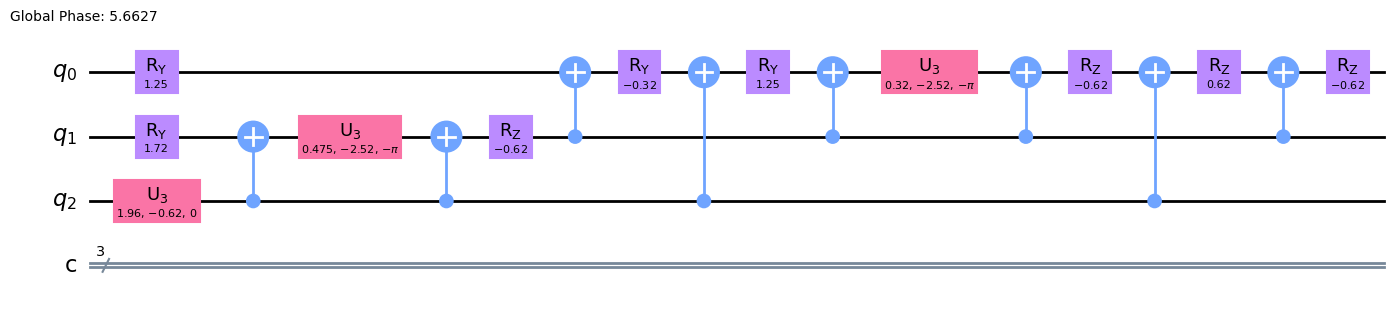

In [12]:
result = qiskit.transpile(qiskit.compiler.transpile(qtm.state.create_AME_state(3)), backend=qtm.constant.backend, optimization_level=3)
result.draw('mpl')

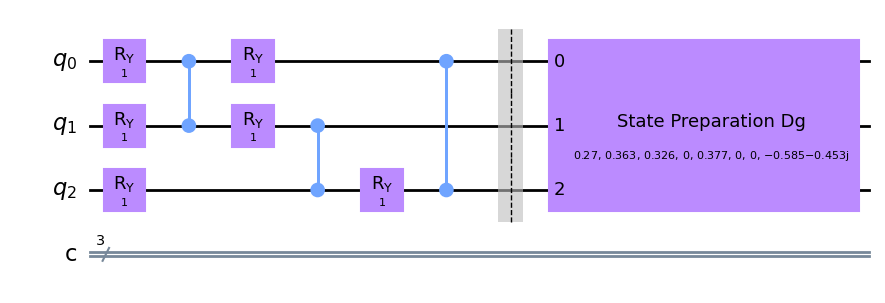

In [7]:
num_qubits = 3
num_layers = 1
thetas = np.ones(2*num_qubits*num_layers)
qc = qiskit.QuantumCircuit(3,3)
qc = qtm.ansatz.create_AMEchecker_polygongraph(qc, thetas, num_layers)
# qc = qtm.state.create_AME_state(num_qubits).inverse()
qc.draw('mpl')

Step:   0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Step: 100%|██████████| 100/100 [03:39<00:00,  2.19s/it]


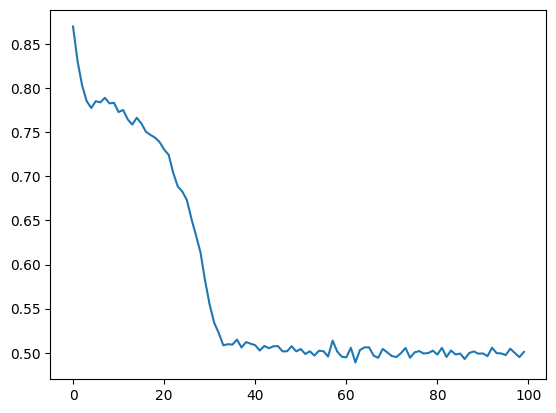

In [2]:
num_qubits = 3
num_layers = 1
thetas = np.ones(2*num_qubits*num_layers)

qng_compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_polygongraph_ansatz,
    vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
qng_compiler.fit(num_steps = 100, verbose = 1)

plt.plot(qng_compiler.loss_values)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


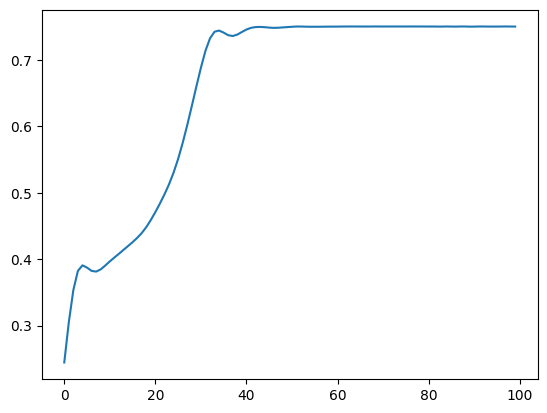

In [3]:
plt.plot(qng_compiler.fidelities)

In [3]:
num_qubits = 3
num_layers = 2
thetas = np.zeros(2*num_qubits*num_layers)

adam_compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_AMEchecker_polygongraph,
    vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
adam_compiler.fit(num_steps = 100, verbose = 1)

plt.plot(adam_compiler.loss_values)

Step:  28%|██▊       | 28/100 [06:48<17:31, 14.61s/it]


Step: 100%|██████████| 100/100 [25:14<00:00, 15.15s/it]


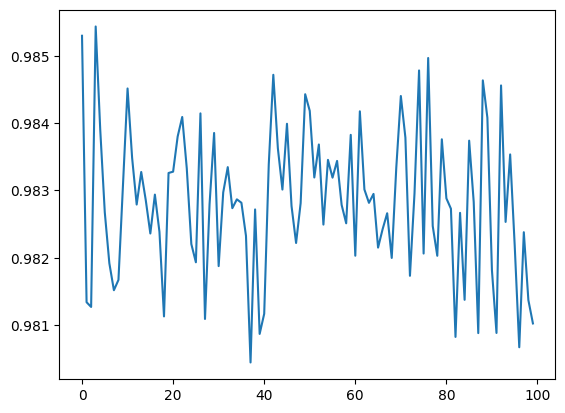

In [10]:
num_qubits = 3
num_layers = 2
thetas = np.zeros(2*num_qubits*num_layers)

sgd_compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_AMEchecker_polygongraph,
    vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
    optimizer = 'sgd',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
sgd_compiler.fit(num_steps = 100, verbose = 1)

plt.plot(sgd_compiler.loss_values)

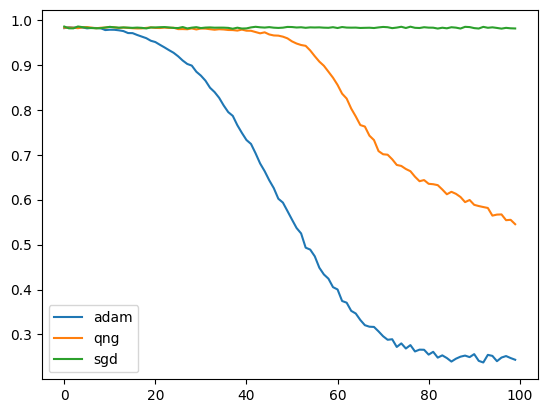

In [17]:
iterations = list(range(0,100))
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(iterations,adam_compiler.loss_values, label = "adam")
ax.plot(iterations,qng_compiler.loss_values, label = "qng")
ax.plot(iterations,sgd_compiler.loss_values, label = "sgd")
ax.legend()
fig.savefig("/home/fptu/UC-VQA/images/AME_polygon.png")


In [50]:
import pandas as pd
alternating = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/alternating_AME/loss_valuesqng_poly.csv')
alternating_list = []
alternating_list.append(float(alternating.columns[0]))
for i in alternating.values:
    alternating_list.append(float(i))

poly = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/AME_polygon_ansats/loss_valuesqng_poly.csv')
poly_list = []
poly_list.append(float(poly.columns[0]))
for i in poly.values:
    poly_list.append(float(i))

linear = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/linear/loss_valuesqng_poly.csv')
linear_list = []
linear_list.append(float(linear.columns[0]))
for i in linear.values:
    linear_list.append(float(i))

Wchain = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/Wchain_AME/loss_valuesqng_poly.csv')
Wchain_list = []
Wchain_list.append(float(Wchain.columns[0]))
for i in Wchain.values:
    Wchain_list.append(float(i))

WchainCNOT = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/WchainCNOT/loss_valuesqng_poly.csv')
WchainCNOT_list = []
WchainCNOT_list.append(float(WchainCNOT.columns[0]))
for i in WchainCNOT.values:
    WchainCNOT_list.append(float(i))


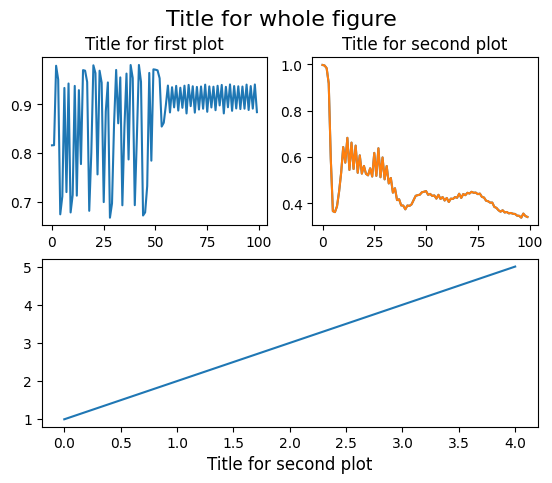

In [5]:
data = [1, 2, 3, 4, 5]

fig = plt.figure()
fig.suptitle("Title for whole figure", fontsize=16)
ax = plt.subplot(2,2,1)
ax.set_title("Title for first plot")
ax.plot(alternating_list)

ax = plt.subplot(2,2,2)
ax.set_title("Title for second plot")
ax.plot(poly_list)

ax = plt.subplot(2,2,2)
ax.set_title("Title for second plot")
ax.plot(poly_list)

ax = plt.subplot(2,1,2)
ax.set_title("Title for second plot",y=-0.3)
ax.plot(data)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


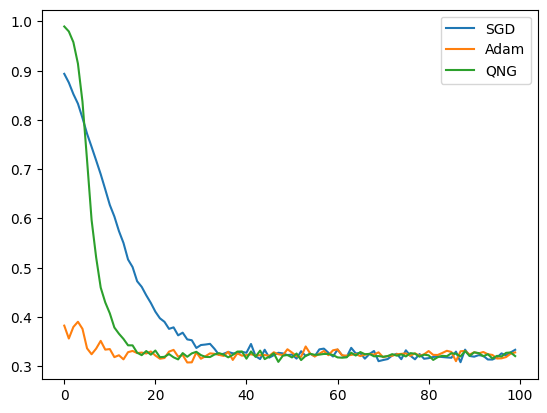

In [20]:
linear = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/poly_layer_3/loss_valuesqng_poly.csv')
linear_list = []
linear_list.append(float(linear.columns[0]))
for i in linear.values:
    linear_list.append(float(i))

Wchain = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/poly_layer_3/loss_valuesadam_poly.csv')
Wchain_list = []
Wchain_list.append(float(Wchain.columns[0]))
for i in Wchain.values:
    Wchain_list.append(float(i))

WchainCNOT = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/poly_layer_3/loss_valuessgd_poly.csv')
WchainCNOT_list = []
WchainCNOT_list.append(float(WchainCNOT.columns[0]))
for i in WchainCNOT.values:
    WchainCNOT_list.append(float(i))
iterations = list(range(0,100))
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(iterations,WchainCNOT_list, label = "SGD")
ax.plot(iterations,Wchain_list, label = "Adam")
ax.plot(iterations,linear_list, label = "QNG")
ax.legend()
fig.savefig("/home/fptu/tung/UC-VQA/images/AME_polygon_3_layers.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


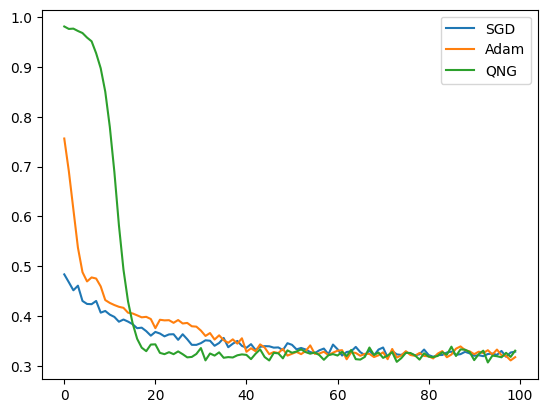

In [21]:
linear = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/star_layer_3/loss_valuesqng_star.csv')
linear_list = []
linear_list.append(float(linear.columns[0]))
for i in linear.values:
    linear_list.append(float(i))

Wchain = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/star_layer_3/loss_valuesadam_star.csv')
Wchain_list = []
Wchain_list.append(float(Wchain.columns[0]))
for i in Wchain.values:
    Wchain_list.append(float(i))

WchainCNOT = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/star_layer_3/loss_valuessgd_star.csv')
WchainCNOT_list = []
WchainCNOT_list.append(float(WchainCNOT.columns[0]))
for i in WchainCNOT.values:
    WchainCNOT_list.append(float(i))
iterations = list(range(0,100))
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(iterations,WchainCNOT_list, label = "SGD")
ax.plot(iterations,Wchain_list, label = "Adam")
ax.plot(iterations,linear_list, label = "QNG")
ax.legend()
fig.savefig("/home/fptu/tung/UC-VQA/images/AME_star_3_layers.eps")

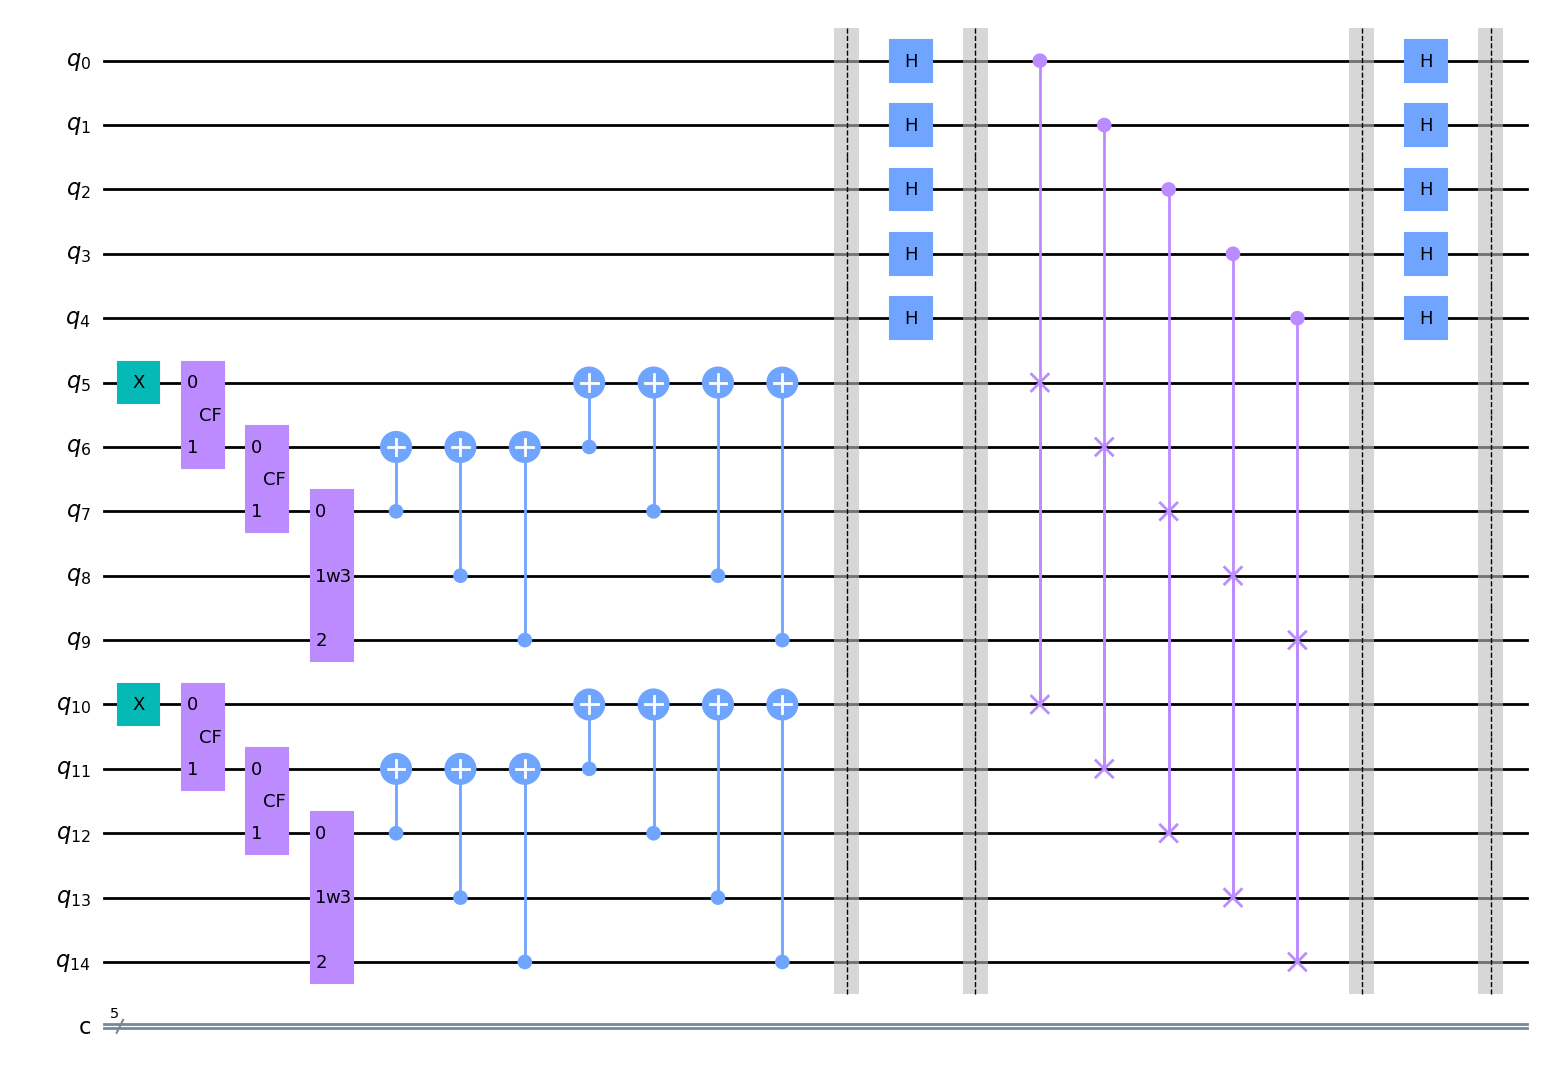

In [47]:
import qiskit
import numpy as np

circuit = qtm.state.create_w_state(5)
n_qubit = circuit.num_qubits
qubits_list_first = list(range(n_qubit, 2*n_qubit))
qubits_list_second = list(range(2*n_qubit, 3*n_qubit))

# Create swap test circuit
swap_test_circuit = qiskit.QuantumCircuit(3*n_qubit, n_qubit)

# Add initial circuit the first time

swap_test_circuit = swap_test_circuit.compose(circuit, qubits=qubits_list_first)
# Add initial circuit the second time
swap_test_circuit = swap_test_circuit.compose(circuit, qubits=qubits_list_second)
swap_test_circuit.barrier()

# Add hadamard gate
swap_test_circuit.h(list(range(0, n_qubit)))
swap_test_circuit.barrier()
    
for i in range(n_qubit):
    # Add control-swap gate
    swap_test_circuit.cswap(i, i+n_qubit, i+2*n_qubit)
swap_test_circuit.barrier()

# Add hadamard gate
swap_test_circuit.h(list(range(0, n_qubit)))
swap_test_circuit.barrier()
swap_test_circuit.draw(output='mpl')


In [48]:
qubit = list(range(n_qubit))
n = len(qubit)
cbits = qubit.copy()
for i in range(0,n):
    swap_test_circuit.measure(qubit[i],cbits[i])

counts = qiskit.execute(
    swap_test_circuit,backend=qiskit.Aer.get_backend('qasm_simulator'),shots=10000
).result().get_counts()
1-counts.get("0"*len(qubit),0)/10000

0.39380000000000004

In [34]:
counts

{'000': 10000}

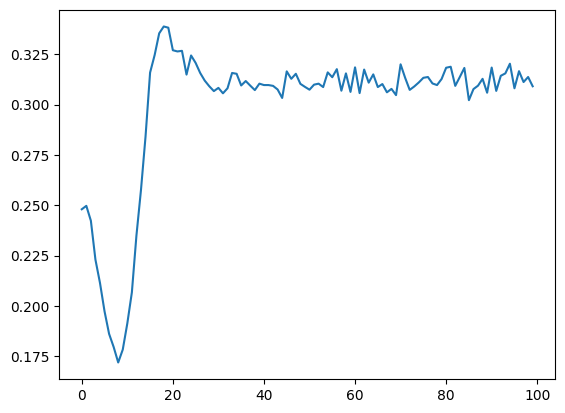

In [51]:
linear = pd.read_csv('/home/fptu/tung/UC-VQA/experiments/poly_layer_5/ce_valuesqng_poly.csv')
linear_list = []
linear_list.append(float(linear.columns[0]))
for i in linear.values:
    linear_list.append(float(i))
plt.plot(linear_list)    

In [43]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumRegister, QuantumCircuit, Aer
import qiskit
v = qtm.state.create_AME_state(3)
probs = qtm.utilities.concentratable_entanglement(v,exact=True)
probs

0.35451619554226266

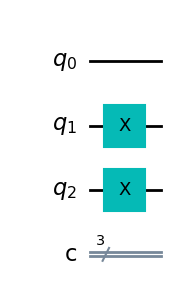

In [11]:
qc.draw(output='mpl')


<Figure size 1000x800 with 0 Axes>

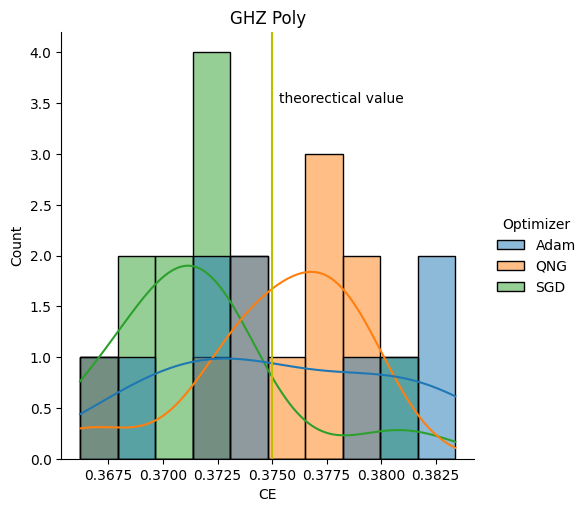

<Figure size 640x480 with 0 Axes>

In [91]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,8))

ce_adam = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/ghz_poly_2_layers/ce_valuesadam_poly_{i}.csv")
    ce_adam.append(float(ce.columns[0]))
# plot = sn.displot(ce_adam, color="red", label="Adam", kde=True)

ce_qng = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/ghz_poly_2_layers/ce_valuesqng_poly_{i}.csv")
    ce_qng.append(float(ce.columns[0]))
# plot = sn.displot(ce_qng,color="green", label="QNG", kde=True)

ce_sgd = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/ghz_poly_2_layers/ce_valuessgd_poly_{i}.csv")
    ce_sgd.append(float(ce.columns[0]))
# plot = sn.distplot(ce_sgd,rug=True,hist=True)
list_value = []
list_opt = []
list_value.extend(ce_adam)
list_opt.extend(["Adam"]*len(ce_adam))
list_value.extend(ce_qng)
list_opt.extend(["QNG"]*len(ce_qng))
list_value.extend(ce_sgd)
list_opt.extend(["SGD"]*len(ce_sgd))
df = pd.DataFrame(list(zip(list_value, list_opt)),
               columns =['CE', 'Optimizer'])
sn.displot(df,
            x="CE", 
            hue="Optimizer",kde=True,bins=10)
# sn.displot(ce_adam, color='green',kde=True,bins=10,rug=True)
# sn.displot(ce_qng, color='red',kde=True,bins=10,rug=True)
plt.axvline(0.375, 0,1,color='y')
plt.text(0.3753,3.5,'theorectical value')
plt.title("GHZ Poly")
plt.show()
plt.savefig("/home/fptu/tung/UC-VQA/images/dist/ghz_poly.eps")


<Figure size 1000x800 with 0 Axes>

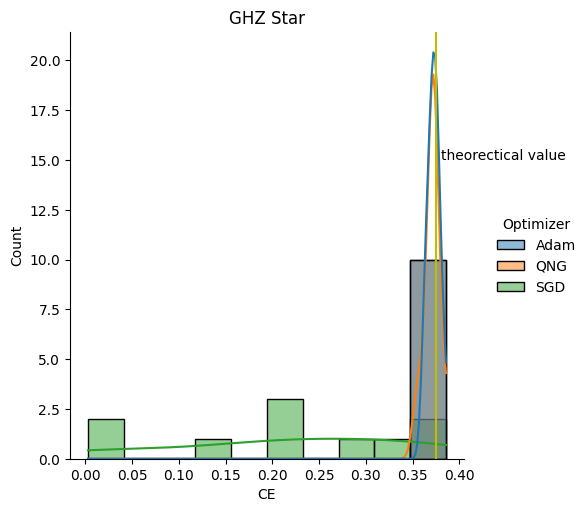

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(10,8))

ce_adam = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/ghz_star_2_layers/ce_valuesadam_star_{i}.csv")
    ce_adam.append(float(ce.columns[0]))
# plot = sn.displot(ce_adam, color="red", label="Adam", kde=True)

ce_qng = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/ghz_star_2_layers/ce_valuesqng_star_{i}.csv")
    ce_qng.append(float(ce.columns[0]))
# plot = sn.displot(ce_qng,color="green", label="QNG", kde=True)

ce_sgd = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/ghz_star_2_layers/ce_valuessgd_star_{i}.csv")
    ce_sgd.append(float(ce.columns[0]))
# plot = sn.distplot(ce_sgd,rug=True,hist=True)
list_value = []
list_opt = []
list_value.extend(ce_adam)
list_opt.extend(["Adam"]*len(ce_adam))
list_value.extend(ce_qng)
list_opt.extend(["QNG"]*len(ce_qng))
list_value.extend(ce_sgd)
list_opt.extend(["SGD"]*len(ce_sgd))
df = pd.DataFrame(list(zip(list_value, list_opt)),
               columns =['CE', 'Optimizer'])
sn.displot(df,
            x="CE", 
            hue="Optimizer",kde=True,bins=10)
# sn.displot(ce_adam, color='green',kde=True,bins=10,rug=True)
# sn.displot(ce_qng, color='red',kde=True,bins=10,rug=True)
plt.axvline(0.375, 0,1,color='y')
plt.text(0.38,15,'theorectical value')
plt.title("GHZ Star")
plt.show()
plt.savefig("/home/fptu/tung/UC-VQA/images/dist/ghz_star.eps")


<Figure size 1000x800 with 0 Axes>

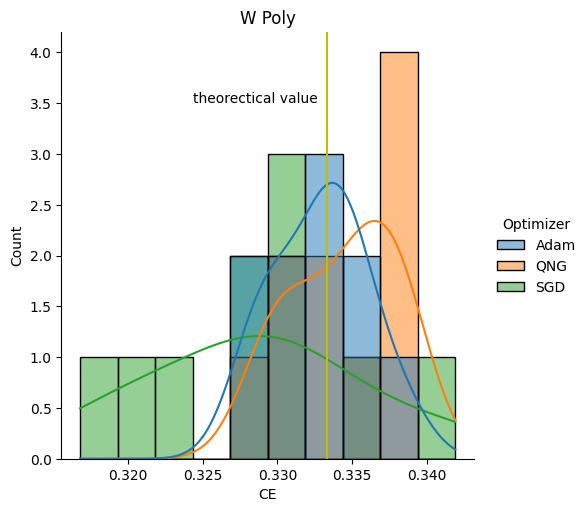

<Figure size 640x480 with 0 Axes>

In [109]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,8))

ce_adam = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/w_poly_2_layer/ce_valuesadam_poly_{i}.csv")
    ce_adam.append(float(ce.columns[0]))
# plot = sn.displot(ce_adam, color="red", label="Adam", kde=True)

ce_qng = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/w_poly_2_layer/ce_valuesqng_poly_{i}.csv")
    ce_qng.append(float(ce.columns[0]))
# plot = sn.displot(ce_qng,color="green", label="QNG", kde=True)

ce_sgd = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/w_poly_2_layer/ce_valuessgd_poly_{i}.csv")
    ce_sgd.append(float(ce.columns[0]))
# plot = sn.distplot(ce_sgd,rug=True,hist=True)
list_value = []
list_opt = []
list_value.extend(ce_adam)
list_opt.extend(["Adam"]*len(ce_adam))
list_value.extend(ce_qng)
list_opt.extend(["QNG"]*len(ce_qng))
list_value.extend(ce_sgd)
list_opt.extend(["SGD"]*len(ce_sgd))
df = pd.DataFrame(list(zip(list_value, list_opt)),
               columns =['CE', 'Optimizer'])
sn.displot(df,
            x="CE", 
            hue="Optimizer",kde=True,bins=10)
# sn.displot(ce_adam, color='green',kde=True,bins=10,rug=True)
# sn.displot(ce_qng, color='red',kde=True,bins=10,rug=True)
plt.axvline((3-1)/(2*3), 0,1,color='y')
plt.text((3-1)/(2*3)-0.009,3.5,'theorectical value')
plt.title("W Poly")
plt.show()
plt.savefig("/home/fptu/tung/UC-VQA/images/dist/W_poly.eps")

<Figure size 1000x800 with 0 Axes>

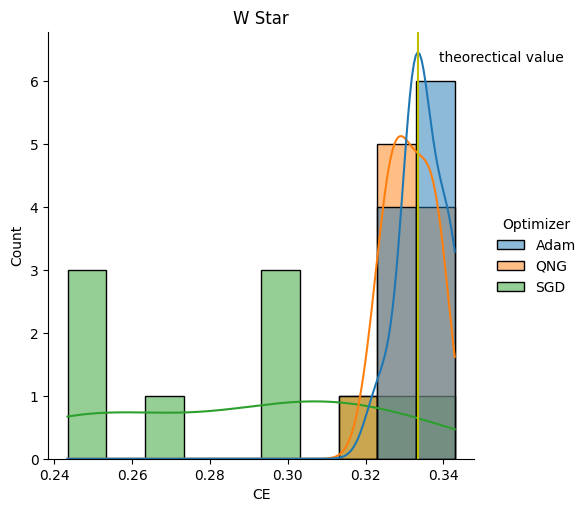

<Figure size 640x480 with 0 Axes>

In [117]:
plt.figure(figsize=(10,8))

ce_adam = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/w_star_2_layer/ce_valuesadam_star_{i}.csv")
    ce_adam.append(float(ce.columns[0]))
# plot = sn.displot(ce_adam, color="red", label="Adam", kde=True)

ce_qng = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/w_star_2_layer/ce_valuesqng_star_{i}.csv")
    ce_qng.append(float(ce.columns[0]))
# plot = sn.displot(ce_qng,color="green", label="QNG", kde=True)

ce_sgd = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/w_star_2_layer/ce_valuessgd_star_{i}.csv")
    ce_sgd.append(float(ce.columns[0]))
# plot = sn.distplot(ce_sgd,rug=True,hist=True)
list_value = []
list_opt = []
list_value.extend(ce_adam)
list_opt.extend(["Adam"]*len(ce_adam))
list_value.extend(ce_qng)
list_opt.extend(["QNG"]*len(ce_qng))
list_value.extend(ce_sgd)
list_opt.extend(["SGD"]*len(ce_sgd))
df = pd.DataFrame(list(zip(list_value, list_opt)),
               columns =['CE', 'Optimizer'])
sn.displot(df,
            x="CE", 
            hue="Optimizer",kde=True,bins=10)
# sn.displot(ce_adam, color='green',kde=True,bins=10,rug=True)
# sn.displot(ce_qng, color='red',kde=True,bins=10,rug=True)
plt.axvline((3-1)/(2*3), 0,1,color='y')
plt.text((3-1)/(2*3)+0.0055,6.3,'theorectical value')
plt.title("W Star")
plt.show()
plt.savefig("/home/fptu/tung/UC-VQA/images/dist/w_star.eps")

<Figure size 1000x800 with 0 Axes>

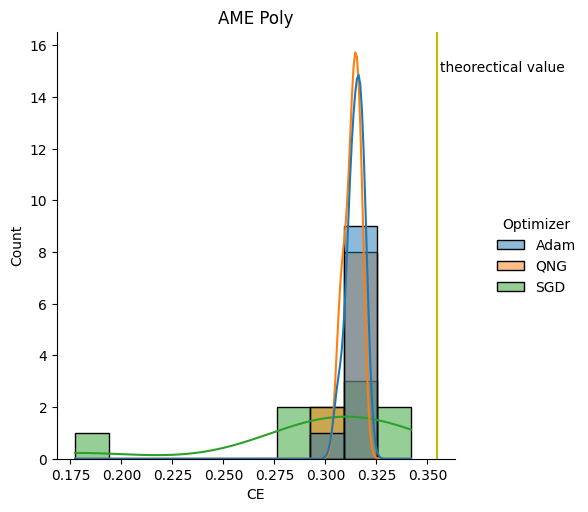

<Figure size 640x480 with 0 Axes>

In [121]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,8))

ce_adam = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/poly_layer_2/ce_valuesadam_poly_{i}.csv")
    ce_adam.append(float(ce.columns[0]))
# plot = sn.displot(ce_adam, color="red", label="Adam", kde=True)

ce_qng = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/poly_layer_2/ce_valuesqng_poly_{i}.csv")
    ce_qng.append(float(ce.columns[0]))
# plot = sn.displot(ce_qng,color="green", label="QNG", kde=True)

ce_sgd = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/poly_layer_2/ce_valuessgd_poly_{i}.csv")
    ce_sgd.append(float(ce.columns[0]))
# plot = sn.distplot(ce_sgd,rug=True,hist=True)
list_value = []
list_opt = []
list_value.extend(ce_adam)
list_opt.extend(["Adam"]*len(ce_adam))
list_value.extend(ce_qng)
list_opt.extend(["QNG"]*len(ce_qng))
list_value.extend(ce_sgd)
list_opt.extend(["SGD"]*len(ce_sgd))
df = pd.DataFrame(list(zip(list_value, list_opt)),
               columns =['CE', 'Optimizer'])
sn.displot(df,
            x="CE", 
            hue="Optimizer",kde=True,bins=10)
# sn.displot(ce_adam, color='green',kde=True,bins=10,rug=True)
# sn.displot(ce_qng, color='red',kde=True,bins=10,rug=True)
plt.axvline(0.35451619554226266, 0,1,color='y')
plt.text(0.356,15,'theorectical value')
plt.title("AME Poly")
plt.show()
plt.savefig("/home/fptu/tung/UC-VQA/images/dist/AME_poly.eps")

<Figure size 1000x800 with 0 Axes>

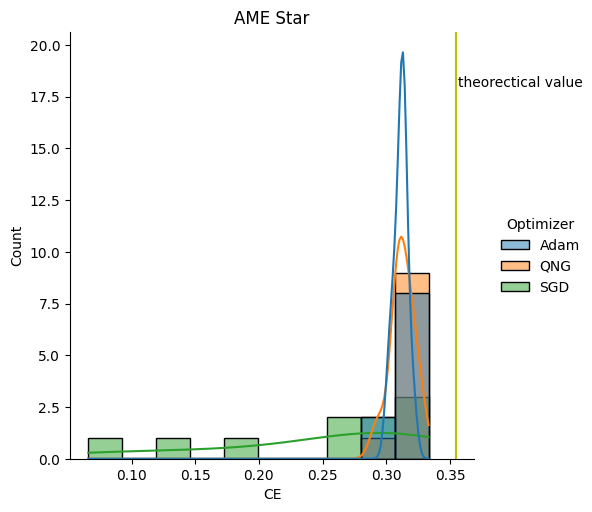

<Figure size 640x480 with 0 Axes>

In [123]:
plt.figure(figsize=(10,8))

ce_adam = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/star_layer_2/ce_valuesadam_star_{i}.csv")
    ce_adam.append(float(ce.columns[0]))
# plot = sn.displot(ce_adam, color="red", label="Adam", kde=True)

ce_qng = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/star_layer_2/ce_valuesqng_star_{i}.csv")
    ce_qng.append(float(ce.columns[0]))
# plot = sn.displot(ce_qng,color="green", label="QNG", kde=True)

ce_sgd = []
for i in range(10):
    ce = pd.read_csv(f"/home/fptu/tung/UC-VQA/experiments/star_layer_2/ce_valuessgd_star_{i}.csv")
    ce_sgd.append(float(ce.columns[0]))
# plot = sn.distplot(ce_sgd,rug=True,hist=True)
list_value = []
list_opt = []
list_value.extend(ce_adam)
list_opt.extend(["Adam"]*len(ce_adam))
list_value.extend(ce_qng)
list_opt.extend(["QNG"]*len(ce_qng))
list_value.extend(ce_sgd)
list_opt.extend(["SGD"]*len(ce_sgd))
df = pd.DataFrame(list(zip(list_value, list_opt)),
               columns =['CE', 'Optimizer'])
sn.displot(df,
            x="CE", 
            hue="Optimizer",kde=True,bins=10)
# sn.displot(ce_adam, color='green',kde=True,bins=10,rug=True)
# sn.displot(ce_qng, color='red',kde=True,bins=10,rug=True)
plt.axvline(0.35451619554226266, 0,1,color='y')
plt.text(0.356,18,'theorectical value')
plt.title("AME Star")
plt.show()
plt.savefig("/home/fptu/tung/UC-VQA/images/dist/AME_star.eps")